In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from scipy.special import boxcox1p
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from scipy.stats import norm, skew
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [106]:
CHF_mean = pd.read_csv('petient_fillwith_mean.csv')
CHF_lec = pd.read_csv('petient_fillwith_lec.csv')

In [107]:
CHF_lec.shape

(45541, 122)

In [108]:
CHF_mean.head()

,Unnamed: 0,SUBJECT_ID,Anion Gap_max,Base Excess_max,Bicarbonate_max,"Calcium, Total_max",Calculated Total CO2_max,Chloride_max,Creatinine_max,Glucose_max,...,pH_std,pO2_std,GENDER,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,AGE,CHF
0,0,2,18.298161,2.991154,29.437206,9.278462,29.288892,109.847365,1.90434,217.976133,...,0.000000,0.000000,M,Private,NONE,UNKNOWN,UNKNOWN,ASIAN,0.0,0
1,1,3,23.000000,6.000000,27.000000,9.100000,34.000000,112.000000,3.20000,293.000000,...,0.054509,76.154137,M,Medicare,NONE,CATHOLIC,MARRIED,WHITE,76.0,1
2,2,4,24.000000,-1.000000,29.000000,11.000000,21.000000,109.000000,1.40000,515.000000,...,0.080829,22.627417,F,Private,NONE,PROTESTANT QUAKER,SINGLE,WHITE,47.0,0
3,3,5,18.298161,2.991154,29.437206,9.278462,29.288892,109.847365,1.90434,217.976133,...,0.000000,0.000000,M,Private,NONE,OTHER,UNKNOWN,ASIAN,0.0,0
4,4,6,23.000000,0.000000,31.000000,10.800000,28.000000,110.000000,13.90000,214.000000,...,0.064187,20.791825,F,Medicare,ENGL,UNKNOWN,MARRIED,WHITE,65.0,0


In [109]:
import pandas
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
CHF_lec.iloc[:,-8:-2] = CHF_lec.iloc[:,-8:-2].apply(le.fit_transform)
CHF_mean.iloc[:,-8:-2] = CHF_mean.iloc[:,-8:-2].apply(le.fit_transform)

In [110]:
import random
random.seed(26)
random_range = list(CHF_lec.index)
num_to_select = len(random_range) // 5
test_items = random.sample(random_range, num_to_select)

In [111]:
train_lec = CHF_lec.loc[CHF_lec.index.isin(test_items) == False, :]
test_lec = CHF_lec.loc[CHF_lec.index.isin(test_items), :]

In [112]:
print('shape of train dataset is {}'.format(train_lec.shape))
print('shape of test dataset is {}'.format(test_lec.shape))

shape of train dataset is (36433, 122)
shape of test dataset is (9108, 122)


In [382]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

In [114]:
nr = NearMiss()
X_train_lec, y_train_lec = nr.fit_sample(train_lec.iloc[:, 2:-1], train_lec.iloc[:,-1])
X_test_lec, y_test_lec = nr.fit_sample(test_lec.iloc[:, 2:-1], test_lec.iloc[:,-1])

In [383]:
smt = SMOTE()
X_train2_lec, y_train2_lec = smt.fit_sample(train_lec.iloc[:, 2:-1], train_lec.iloc[:,-1])
X_test2_lec, y_test2_lec = smt.fit_sample(test_lec.iloc[:, 2:-1], test_lec.iloc[:,-1])

In [384]:
print("before fitting NearMiss", np.bincount(train_lec.iloc[:,-1]))
print("after fitting NearMiss", np.bincount(y_train_lec))
print("after fitting SMOTE", np.bincount(y_train2_lec))


before fitting NearMiss [28621  7812]
after fitting NearMiss [7812 7812]
after fitting SMOTE [28621 28621]


## Model: Random Forest

In [410]:
randomForest = ensemble.RandomForestClassifier()
grid_para_rf = [{
    "criterion": ["gini"],
    "min_samples_leaf": [4],
    "max_features": [8],
    "min_samples_split": [3]
}]
randomForest.set_params(random_state=88, n_estimators = 100)
grid_search_rf = GridSearchCV(randomForest, grid_para_rf, cv=5, scoring='accuracy',n_jobs=-1)

In [390]:
grid_search_rf.fit(X_train_lec, y_train_lec)
y_pred_lec = grid_search_rf.predict(X_test_lec)
grid_search_rf.best_estimator_

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=88,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'crit

In [ ]:
grid_search_rf.best_score_

In [411]:
grid_search_rf.fit(X_train2_lec, y_train2_lec)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=88,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'crit

In [412]:
y_pred2_lec = grid_search_rf.predict(X_test2_lec)
grid_search_rf.best_estimator_


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=88, verbose=0,
                       warm_start=False)

In [413]:
grid_search_rf.best_score_

0.8550365116522833

In [414]:
print('NearMiss')
print(confusion_matrix(y_test_lec, y_pred_lec))
print('SMOTE')
print(confusion_matrix(y_test2_lec, y_pred2_lec))

NearMiss
[[1688  334]
 [ 296 1726]]
SMOTE
[[6166  920]
 [1166 5920]]


In [400]:
print('NearMiss Accuracy:', accuracy_score(y_test_lec, y_pred_lec))
print('SMOTE Accuracy:', accuracy_score(y_test2_lec, y_pred2_lec))

NearMiss Accuracy: 0.844213649851632
SMOTE Accuracy: 0.8528083545018346


In [404]:
print('NearMiss Sensitiity:', round(recall_score(y_test_lec, y_pred_lec),4))
print('SMOTE Sensitiity:', round(recall_score(y_test2_lec, y_pred2_lec),4))

NearMiss Sensitiity: 0.8536
SMOTE Sensitiity: 0.8355


In [361]:
randomForest.set_params(random_state=88, n_estimators = 100,
                        criterion="gini", min_samples_leaf= 4,
                        max_features=8, min_samples_split = 4)
randomForest.fit(X_train_lec, y_train_lec)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=88, verbose=0,
                       warm_start=False)

In [362]:
feature_importance = list(zip(train_lec.iloc[:,2:-1].columns, randomForest.feature_importances_))

<function matplotlib.pyplot.show(*args, **kw)>

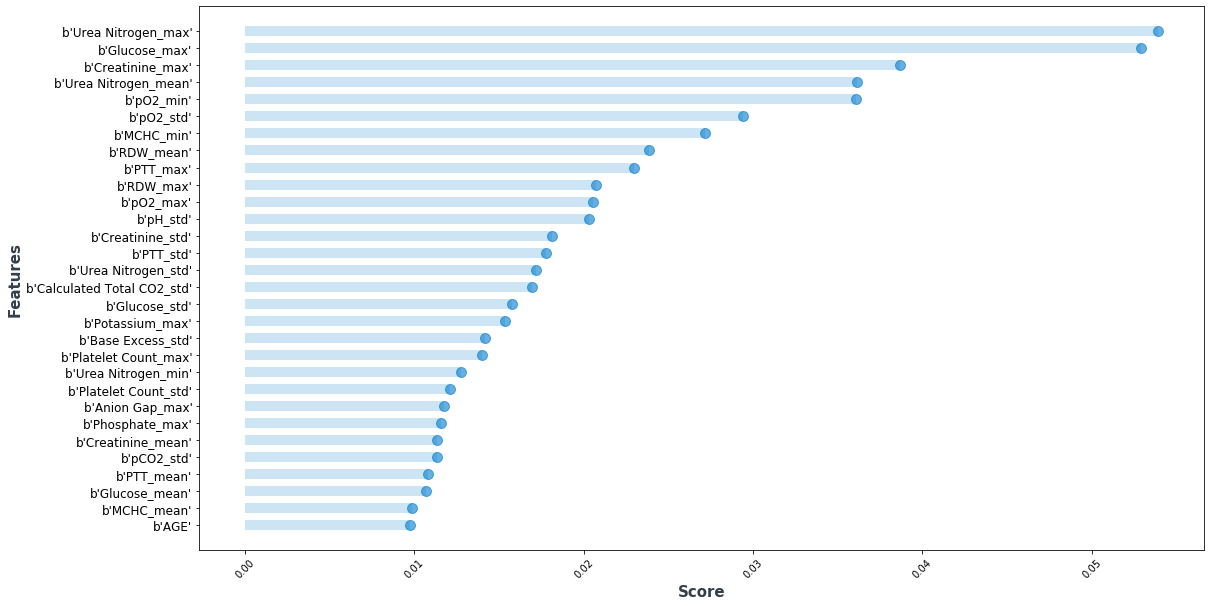

In [363]:
plt.figure(figsize=(18,10))
dtype = [('feature', 'S25'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
df_plt = pd.DataFrame({'name':name,'score':score}).sort_values('score')[-30:]
plt.xticks(rotation = 45)

my_range=list(range(1,len(df_plt.index)+1))

plt.hlines(y=my_range, xmin=0, xmax=df_plt['score'], color='#007ACC', alpha=0.2, linewidth=10)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(df_plt['score'], my_range, "o", markersize=10, color='#007ACC', alpha=0.6)
plt.xlabel('Score', fontsize=15, fontweight='black', color = '#333F4B')
plt.ylabel('Features', fontsize=15, fontweight='black', color = '#333F4B')
plt.yticks(my_range, df_plt.name,fontsize=12)
plt.show
#plt.bar(x=df_plt.name, height=df_plt.score)

In [141]:
df_plt

,name,score
0,b'Urea Nitrogen_max',0.053927
1,b'Glucose_max',0.052913
2,b'Creatinine_max',0.038672
3,b'Urea Nitrogen_mean',0.036124
4,b'pO2_min',0.036070
5,b'pO2_std',0.029385
6,b'MCHC_min',0.027141
7,b'RDW_mean',0.023851
8,b'PTT_max',0.022976
9,b'RDW_max',0.020739


### random forest without SMOTE

In [365]:
randomForest = ensemble.RandomForestClassifier()
grid_para_rf = [{
    "criterion": ["gini"],
    "min_samples_leaf": [4],
    "max_features": [8],
    "min_samples_split": [4]
}]
randomForest.set_params(random_state=88, n_estimators = 100)
grid_search_rf = GridSearchCV(randomForest, grid_para_rf, cv=5, scoring='accuracy',n_jobs=-1)

In [366]:
grid_search_rf.fit(train_lec.iloc[:, 2:-1].values, train_lec.iloc[:,-1])

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=88,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'crit

In [373]:
grid_search_rf.score(train_lec.iloc[:, 2:-1].values, train_lec.iloc[:,-1])

0.9659923695550737

In [378]:
y_test_ori = grid_search_rf.predict(test_lec.iloc[:, 2:-1])

In [379]:
confusion_matrix(test_lec.iloc[:,-1], y_test_ori)

array([[6779,  307],
       [1306,  716]])

In [375]:
recall_score(test_lec.iloc[:,-1], y_test_ori)

0.35410484668644904

In [377]:
accuracy_score(test_lec.iloc[:,-1], y_test_ori)

0.8229029424681599

# Gradient Boosting

In [251]:
GBoost = GradientBoostingClassifier()
grid_para_gb = [{
    'learning_rate':[0.05]
}]
GBoost.set_params(random_state=88, max_features='sqrt',
                  max_depth=6, min_samples_leaf = 14,min_samples_split=2,
                 n_estimators = 500)
grid_search_gb = GridSearchCV(GBoost, grid_para_gb, cv=5, scoring='accuracy',n_jobs=-1)

In [252]:
grid_search_gb.fit(X_train_lec, y_train_lec)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=6,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=14,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=500,
                                                  n_iter_no_change=None,
                                                  preso

In [253]:
grid_search_gb.score(X_train_lec, y_train_lec)

0.9807347670250897

In [254]:
grid_search_gb.cv_results_

{'mean_fit_time': array([30.44115529]),
 'std_fit_time': array([7.79525018]),
 'mean_score_time': array([0.08827949]),
 'std_score_time': array([0.02391814]),
 'param_learning_rate': masked_array(data=[0.05],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.05}],
 'split0_test_score': array([0.91266795]),
 'split1_test_score': array([0.9053103]),
 'split2_test_score': array([0.89148528]),
 'split3_test_score': array([0.82138284]),
 'split4_test_score': array([0.72695262]),
 'mean_test_score': array([0.8515745]),
 'std_test_score': array([0.07021807]),
 'rank_test_score': array([1], dtype=int32)}

In [255]:
grid_search_gb.predict_proba(X_test_lec)

array([[0.93760978, 0.06239022],
       [0.99364536, 0.00635464],
       [0.98750417, 0.01249583],
       ...,
       [0.00183389, 0.99816611],
       [0.20198074, 0.79801926],
       [0.36091331, 0.63908669]])

In [256]:
grid_search_gb.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=6,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=14, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=88, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [257]:
grid_search_gb.best_params_

{'learning_rate': 0.05}

In [258]:
grid_search_gb.best_score_

0.8515745007680492

In [259]:
y_predict_lec = grid_search_gb.predict(X_test_lec)

In [260]:
confusion_matrix(y_test_lec, y_predict_lec, labels = [0,1])

array([[1737,  285],
       [ 287, 1735]])

In [261]:
recall_score(y_test_lec, y_predict_lec)

0.8580613254203758

In [262]:
accuracy_score(y_test_lec, y_predict_lec)

0.8585558852621167

In [358]:
GBoost.fit(X_train_lec, y_train_lec)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=14, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=88, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

<function matplotlib.pyplot.show(*args, **kw)>

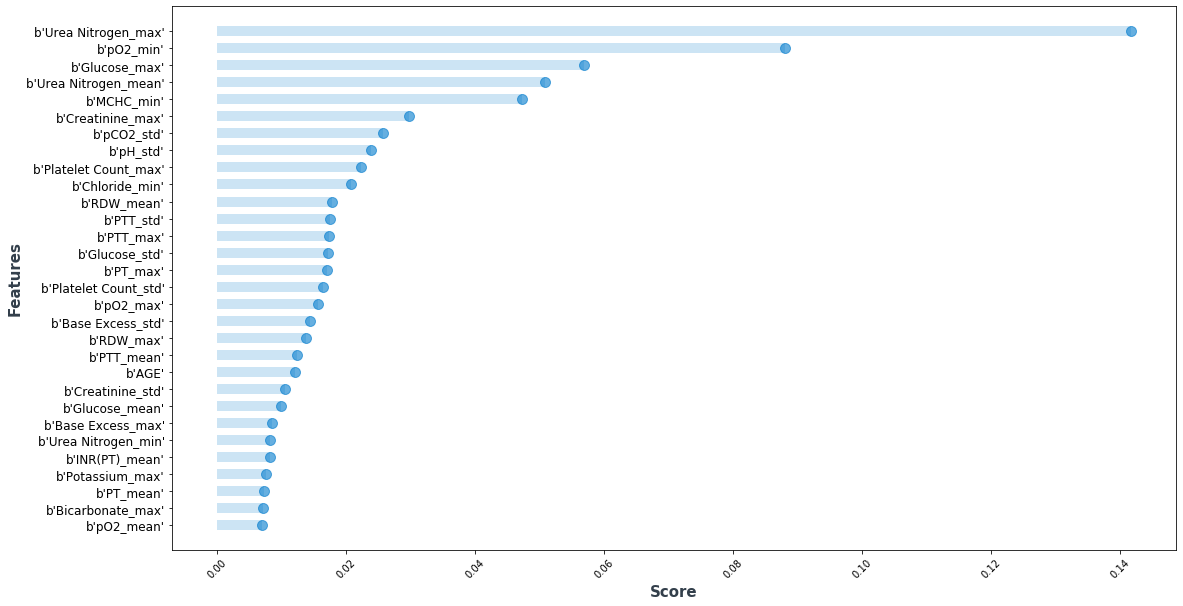

In [360]:
plt.figure(figsize=(18,10))
dtype = [('feature', 'S25'), ('importance', 'float')]
feature_importance = list(zip(train_lec.iloc[:,2:-1].columns, GBoost.feature_importances_))
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
df_plt = pd.DataFrame({'name':name,'score':score}).sort_values('score')[-30:]
plt.xticks(rotation = 45)

my_range=list(range(1,len(df_plt.index)+1))

plt.hlines(y=my_range, xmin=0, xmax=df_plt['score'], color='#007ACC', alpha=0.2, linewidth=10)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(df_plt['score'], my_range, "o", markersize=10, color='#007ACC', alpha=0.6)
plt.xlabel('Score', fontsize=15, fontweight='black', color = '#333F4B')
plt.ylabel('Features', fontsize=15, fontweight='black', color = '#333F4B')
plt.yticks(my_range, df_plt.name,fontsize=12)
plt.show

## XGBoosting

In [345]:
import xgboost as xgb
XGBoost = xgb.XGBClassifier()
grid_para_xgb = [{
    'colsample_bytree':[0.4],
    'gamma':[1], 
    'max_depth':[6], 
    'reg_alpha':[0.25], 
    'reg_lambda':[0.01],
    'n_estimators':[300]
}]
XGBoost.set_params(random_state=88, min_child_weight=1.7817,
                  nthread = -1,subsample=0.3,learning_rate=0.05)
grid_search_xgb = GridSearchCV(XGBoost, grid_para_xgb, cv=5, scoring='accuracy',n_jobs=-1)

In [346]:
grid_search_xgb.fit(X_train_lec, y_train_lec)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bytree=1,
                                     gamma=0, learning_rate=0.05,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1.7817, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=-1,
                                     objective='binary:logistic',
                                     random_state=88, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=True,
                                     subsample=0.3),
             iid='warn', n_jobs=-1,
             param_grid=[{'colsample_bytree': [0.4], 'gamma': [1],
                          'max_depth': [6], 'n_estimators': [300],
                          'reg_alpha': [0.25], 'reg_lambda': 

In [347]:
grid_search_xgb.score(X_train_lec, y_train_lec)

0.9445724526369688

In [348]:
grid_search_xgb.best_score_

0.8502304147465438

In [349]:
y_predict_lec = grid_search_xgb.predict(X_test_lec)

In [350]:
confusion_matrix(y_test_lec, y_predict_lec, labels = [0,1])

array([[1727,  295],
       [ 281, 1741]])

In [351]:
recall_score(y_test_lec, y_predict_lec)

0.8610286844708209

In [352]:
accuracy_score(y_test_lec, y_predict_lec)

0.857566765578635

In [355]:
XGBoost.fit(X_train_lec, y_train_lec)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1.7817, missing=None,
              n_estimators=100, n_jobs=1, nthread=-1,
              objective='binary:logistic', random_state=88, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=0.3)

<function matplotlib.pyplot.show(*args, **kw)>

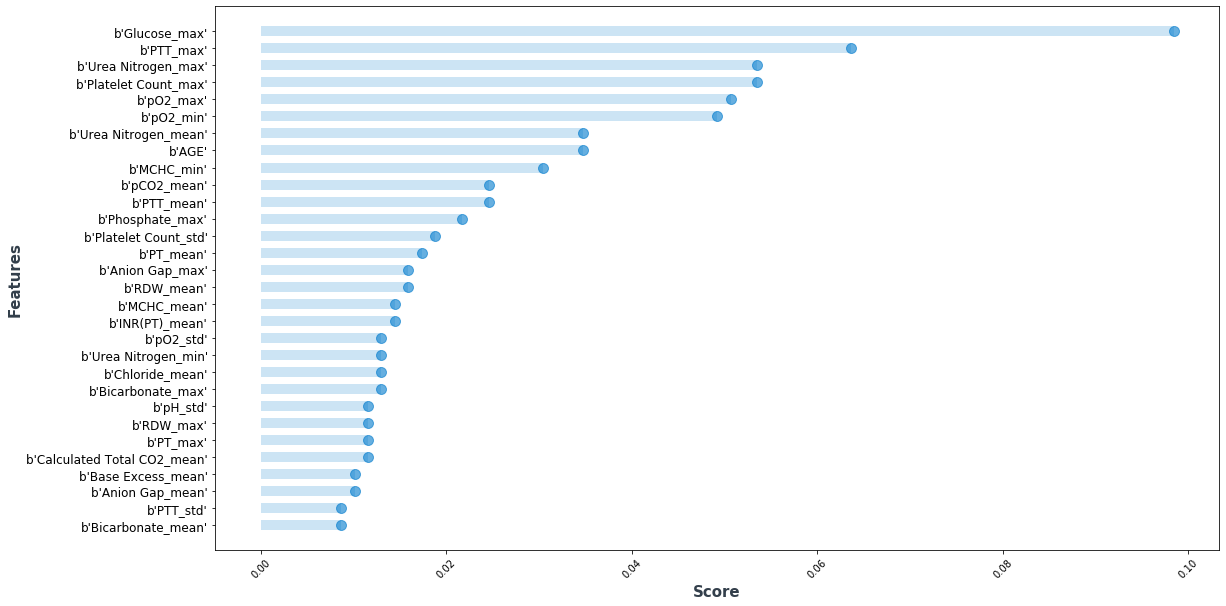

In [357]:
plt.figure(figsize=(18,10))
dtype = [('feature', 'S25'), ('importance', 'float')]
feature_importance = list(zip(train_lec.iloc[:,2:-1].columns, XGBoost.feature_importances_))
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
df_plt = pd.DataFrame({'name':name,'score':score}).sort_values('score')[-30:]
plt.xticks(rotation = 45)

my_range=list(range(1,len(df_plt.index)+1))

plt.hlines(y=my_range, xmin=0, xmax=df_plt['score'], color='#007ACC', alpha=0.2, linewidth=10)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(df_plt['score'], my_range, "o", markersize=10, color='#007ACC', alpha=0.6)
plt.xlabel('Score', fontsize=15, fontweight='black', color = '#333F4B')
plt.ylabel('Features', fontsize=15, fontweight='black', color = '#333F4B')
plt.yticks(my_range, df_plt.name,fontsize=12)
plt.show

In [100]:
randomForest = ensemble.RandomForestClassifier()
grid_para_rf = [{
    "criterion": ["gini"],
    "min_samples_leaf": [4],
    "max_features": [8],
    "min_samples_split": [4]
}]
randomForest.set_params(random_state=88, n_estimators = 200)
grid_search_rf = GridSearchCV(randomForest, grid_para_rf, cv=5, scoring='accuracy',n_jobs=-1)

In [101]:
grid_search_rf.fit(X_train_lec, y_train_lec)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False, random_state=88,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'crit

In [102]:
y_pred_lec = grid_search_rf.predict(X_test_lec)

In [104]:
print(confusion_matrix(y_test_lec, y_pred_lec))
print('accuracy',accuracy_score(y_test_lec, y_pred_lec))
print('recall_score',recall_score(y_test_lec, y_pred_lec))

[[1685  337]
 [ 302 1720]]
accuracy 0.8419881305637982
recall_score 0.8506429277942631


In [83]:
randomForest.fit(x_train_CHF, y_train_CHF)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=88, verbose=0,
                       warm_start=False)

<function matplotlib.pyplot.show(*args, **kw)>

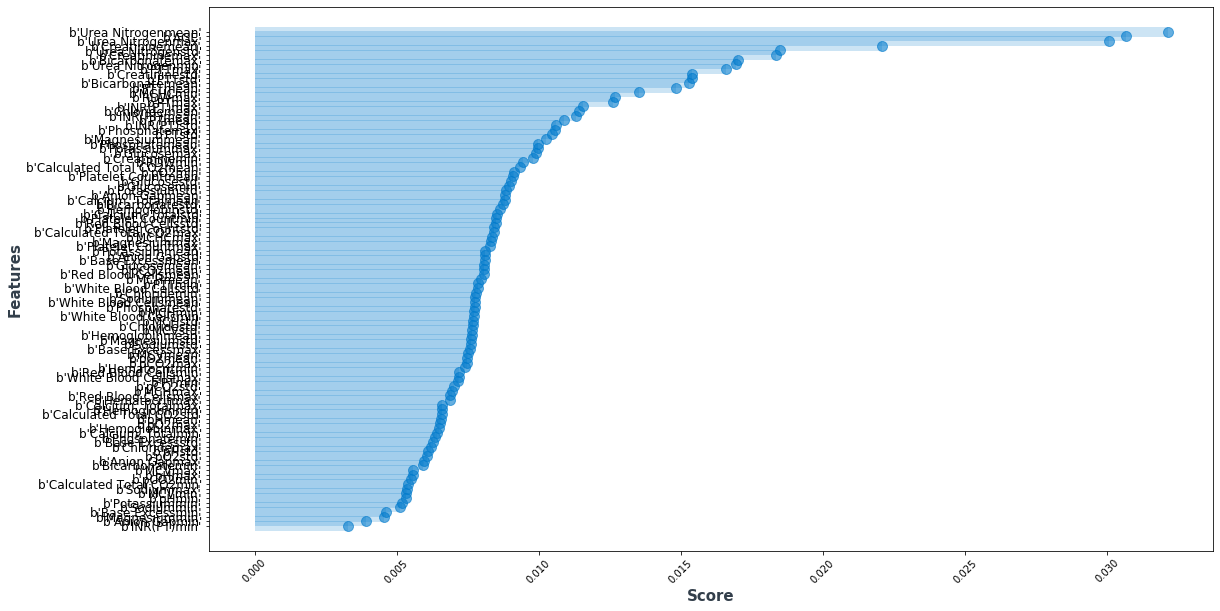

In [26]:
plt.figure(figsize=(18,10))

feature_importance = list(zip(x_train_CHF, randomForest.feature_importances_))
dtype = [('feature', 'S25'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
df_plt = pd.DataFrame({'name':name,'score':score}).sort_values('score')[:]
plt.xticks(rotation = 45)

my_range=list(range(1,len(df_plt.index)+1))

plt.hlines(y=my_range, xmin=0, xmax=df_plt['score'], color='#007ACC', alpha=0.2, linewidth=10)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(df_plt['score'], my_range, "o", markersize=10, color='#007ACC', alpha=0.6)
plt.xlabel('Score', fontsize=15, fontweight='black', color = '#333F4B')
plt.ylabel('Features', fontsize=15, fontweight='black', color = '#333F4B')
plt.yticks(my_range, df_plt.name,fontsize=12)
plt.show
#plt.bar(x=df_plt.name, height=df_plt.score)

In [31]:
 df_plt.sort_values('score', ascending = False).head(30)

,name,score
0,b'Urea Nitrogenmean',0.032139
1,b'AGE',0.030658
2,b'Urea Nitrogenmax',0.030087
3,b'Creatininemean',0.022090
4,b'Urea Nitrogenstd',0.018485
5,b'Creatininemax',0.018355
6,b'Bicarbonatemax',0.017024
7,b'Urea Nitrogenmin',0.016951
8,b'PTTmax',0.016605
9,b'Creatininestd',0.015400


In [84]:
confusion_matrix(y_test_CHF,randomForest.predict(x_test_CHF), labels = [0,1])

array([[2780,  128],
       [ 588,  359]])

## Model: Bagging

In [35]:
bagging = ensemble.BaggingClassifier()
grid_para_bag = [{'n_estimators':[100], 
                  'random_state':[42], 
                  'max_features':[60]}]
grid_search_bag = GridSearchCV(bagging, grid_para_bag, cv=5, scoring='accuracy')
grid_search_bag.fit(x_train_CHF, y_train_CHF)


KeyboardInterrupt: 

In [ ]:
print("The training error of bagging forest is: %.5f" %(1 - grid_search_bag.score(x_train_CHF, y_train_CHF)))
print("The test     error of bagging forest is: %.5f" %(1 - grid_search_bag.score(x_test_CHF, y_test_CHF)))

In [268]:
confusion_matrix(y_test_CHF,grid_search_bag.predict(x_test_CHF), labels = [0,1])

array([[7003,  286],
       [1239,  720]])

In [ ]:
bagging = ensemble.BaggingClassifier()
grid_para_bag = [{'n_estimators':[100], 
                  'random_state':[42], 
                  'max_features':[13]}]
grid_search_bag = GridSearchCV(bagging, grid_para_bag, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_bag.fit(x_train_CHF, y_train_CHF)

## Model: Gradient Boosting

In [54]:
GBoost = GradientBoostingClassifier(n_estimators=2000, learning_rate=0.05,
                                   max_depth=3, max_features='sqrt',
                                   min_samples_leaf=10, min_samples_split=5, 
                                   random_state =26)

cv_chf = KFold(5, shuffle=True, random_state=42).get_n_splits(x_train_CHF.values)







In [55]:
accuracy= cross_val_score(GBoost, x_train_CHF.values, y_train_CHF.values, scoring="accuracy", cv = cv_chf)

In [57]:
np.mean(accuracy)

0.8385141149803566

In [60]:
GBoost.fit(x_train_CHF.values, y_train_CHF.values)
y_predict = GBoost.predict(x_test_CHF.values)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_CHF, y_predict)

0.8402897923875432

## Model: XGBoostig

In [94]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(colsample_bytree=0.4003, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=1500,
                             reg_alpha=1, reg_lambda=0.5,
                             subsample=0.75, silent=1,
                             random_state =77, nthread = -1)
cv_chf = KFold(5, shuffle=True, random_state=42).get_n_splits(x_train_CHF.values)
xg_accuracy= cross_val_score(model_xgb, x_train_CHF.values, y_train_CHF, scoring="accuracy", cv = cv_chf)

In [95]:
np.mean(xg_accuracy)

0.8376761090991561

In [96]:
model_xgb.fit(x_train_CHF.values, y_train_CHF.values)
y_predict_xg = model_xgb.predict(x_test_CHF.values)
accuracy_score(y_test_CHF.astype(str), y_predict_xg.astype(str))


0.8413711072664359